In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import datetime
import requests
import time


def request_api(url, **kwargs):
    # need to get the API key from spascope - it's free
    payload={}
    headers = {
        'authorization': '...'# enter API key here
    }   
    return requests.request("GET", url, headers=headers, data=payload)



#general functions for data handling
def convert_blocktime(blocktime, delta = 6):
    if blocktime is None:
        return None
    else:
        timestr = blocktime.replace('T',' ').replace('Z','')
        return datetime.datetime.strptime(timestr[:-delta], "%Y-%m-%d %H:%M:%S")
        
def get_rolling_avg(series,window):
    out=[]
    for i in range(0,len(series)):
        if i<window:
            if i==0:
                out.append(series[i])
            else:
                out.append(np.mean(series[:i]))
        else:
            out.append(np.mean(series[i-window:i]))
    return out


In [2]:
# Data available on spacescope dashboard (example csvs in csvs folder or directly via API)

def get_mined_supply(start_date,end_date):
    url = "https://api.spacescope.io/v2/circulating_supply/circulating_supply?start_date={start_date}&end_date={end_date}".format(
        start_date=start_date,
        end_date=end_date
    )
    print(url)
    cnt=0
    check=False
    result = {}
    response = request_api(url)
    while (cnt<10) & (check==False):
        if response.status_code==200:
            result = response.json()['data']
            check=True
            print('success')
        elif response.status_code==429:
            time.sleep(60)
            print('429')
            cnt+=1
        else:
            print('other error')
            check=True

    return result

#only above used for rewards analysis, see here for complete endpoint overview: https://docs.spacescope.io/guides/
def get_clientcount(start_date,end_date):
    url = "https://api.spacescope.io/v2/network_user/client_count?start_date={start_date}&end_date={end_date}".format(
      start_date=start_date,
        end_date=end_date
    )
    print(url)
    cnt=0
    check=False
    result = {}
    response = request_api(url)
    while (cnt<10) & (check==False):
        if response.status_code==200:
            result = response.json()['data']
            check=True
            print('success')
        elif response.status_code==429:
            time.sleep(60)
            print('429')
            cnt+=1
        else:
            print('other error')
            check=True

    return result

def get_miner_reward(start_date,miner_id):
    url = "https://api.spacescope.io/v2/storage_provider/rewards?state_date={start_date}&miner_id={miner_id}".format(
      start_date=start_date,
        miner_id=miner_id
    )
    print(url)
    cnt=0
    check=False
    result = {}
    response = request_api(url)
    while (cnt<10) & (check==False):
        if response.status_code==200:
            result = response.json()['data']
            check=True
            print('success')
        elif response.status_code==429:
            time.sleep(60)
            print('429')
            cnt+=1
        else:
            print('other error')
            check=True

    return result


def get_deal_snapshot(provider_id,page_size, page_num):
    url = "https://api.spacescope.io/v2/deals/deal_snapshot?provider_id={provider_id}&page_size={page_size}&page={page_num}".format(
        provider_id=provider_id,
        page_size=page_size,
        page_num=page_num
    )
    print(url)
    cnt=0
    check=False
    result = {}
    response = request_api(url)
    while (cnt<10) & (check==False):
        if response.status_code==200:
            result = response.json()['data']
            check=True
            print('success')
        elif response.status_code==429:
            time.sleep(60)
            print('429')
            cnt+=1
        else:
            print('other error')
            check=True

    return result

        

In [10]:
#price export from coingecko
df_prices=pd.read_csv('csvs/fil-usd-max.csv')

In [11]:
df_prices['datestr']=[convert_blocktime(df_prices['snapped_at'].iloc[i],delta=4) for i in range(0,len(df_prices))]
df_prices['dateday']=[datetime.date(df_prices.datestr.iloc[i].year,df_prices.datestr.iloc[i].month,df_prices.datestr.iloc[i].day) for i in range(0,len(df_prices))]
df_prices['year_month']=[str(df_prices.iloc[i].datestr.year)+"-"+str(df_prices.iloc[i].datestr.month) for i in range(0, len(df_prices))]

In [12]:
df_prices.groupby('year_month').agg(
    avg_price = ('price','mean')
)

,avg_price
year_month,
2020-10,35.951811
2020-11,29.702257
2020-12,27.489416
2021-1,22.223603
2021-10,66.878525
2021-11,59.160867
2021-12,39.461577
2021-2,35.436311
2021-3,69.813561


In [1]:
lst_month_start=[
'2020-10-01',
'2020-11-01',
'2020-12-01',
'2021-01-01',
'2021-02-01',
'2021-03-01',
'2021-04-01',
'2021-05-01',
'2021-06-01',
'2021-07-01',
'2021-08-01',
'2021-09-01',
'2021-10-01',
'2021-11-01',
'2021-12-01',
'2022-01-01',
'2022-02-01',
'2022-03-01',
'2022-04-01',
'2022-05-01',
'2022-06-01',
'2022-07-01',
'2022-08-01',
'2022-09-01',
'2022-10-01',
'2022-11-01',
'2022-12-01',
'2023-01-01',
'2023-02-01',
'2023-03-01',
'2023-04-01',
'2023-05-01'
]
lst_month_end = [
'2020-10-31',
'2020-11-30',
'2020-12-31',
'2021-01-31',
'2021-02-28',
'2021-03-31',
'2021-04-30',
'2021-05-31',
'2021-06-30',
'2021-07-31',
'2021-08-31',
'2021-09-30',
'2021-10-31',
'2021-11-30',
'2021-12-31',
'2022-01-31',
'2022-02-28',
'2022-03-31',
'2022-04-30',
'2022-05-31',
'2022-06-30',
'2022-07-31',
'2022-08-31',
'2022-09-30',
'2022-10-31',
'2022-11-30',
'2022-12-31',
'2023-01-31',
'2023-02-28',
'2023-03-31',
'2023-04-30',
'2023-05-31'
]

In [30]:

dct_out = {}
cnt = 0
for num_month in range(0, len(lst_month_start)):
  result = get_mined_supply(lst_month_start[num_month],lst_month_end[num_month])
  for i in range(0, len(result)):
    if cnt==0:
      for k in result[0].keys():
        dct_out[k] =[]

    for k in result[0].keys():
      dct_out[k].append(result[i][k])
      cnt+=1
  time.sleep(10)
   

https://api.spacescope.io/v2/circulating_supply/circulating_supply?start_date=2023-02-01&end_date=2023-02-28
success
https://api.spacescope.io/v2/circulating_supply/circulating_supply?start_date=2023-03-01&end_date=2023-03-31
success
https://api.spacescope.io/v2/circulating_supply/circulating_supply?start_date=2023-04-01&end_date=2023-04-30
success
https://api.spacescope.io/v2/circulating_supply/circulating_supply?start_date=2023-05-01&end_date=2023-05-31
success


In [31]:
df_out=pd.DataFrame.from_dict(dct_out)

In [32]:
df_out['datestr']=[convert_blocktime(df_out.stat_date.iloc[i], delta=1) for i in range(0, len(df_out))]
df_out = df_out.sort_values(by='datestr')

In [34]:
for c in ['circulating_fil','mined_fil','vested_fil','locked_fil','burnt_fil','reserve_disbursed_fil']:
    df_out['change_'+c[:5]]=df_out[c]-df_out[c].shift(1)


In [35]:
df_supply = df_out.merge(df_prices[['datestr','price']], how='left',left_on='datestr',right_on='datestr').reset_index()

In [36]:
for c in ['circulating_fil','mined_fil','vested_fil','locked_fil','burnt_fil','reserve_disbursed_fil']:
    df_supply['change_'+c[:5]+'_usd']=df_supply['change_'+c[:5]]*df_supply.price


(-2.0, 2.0)

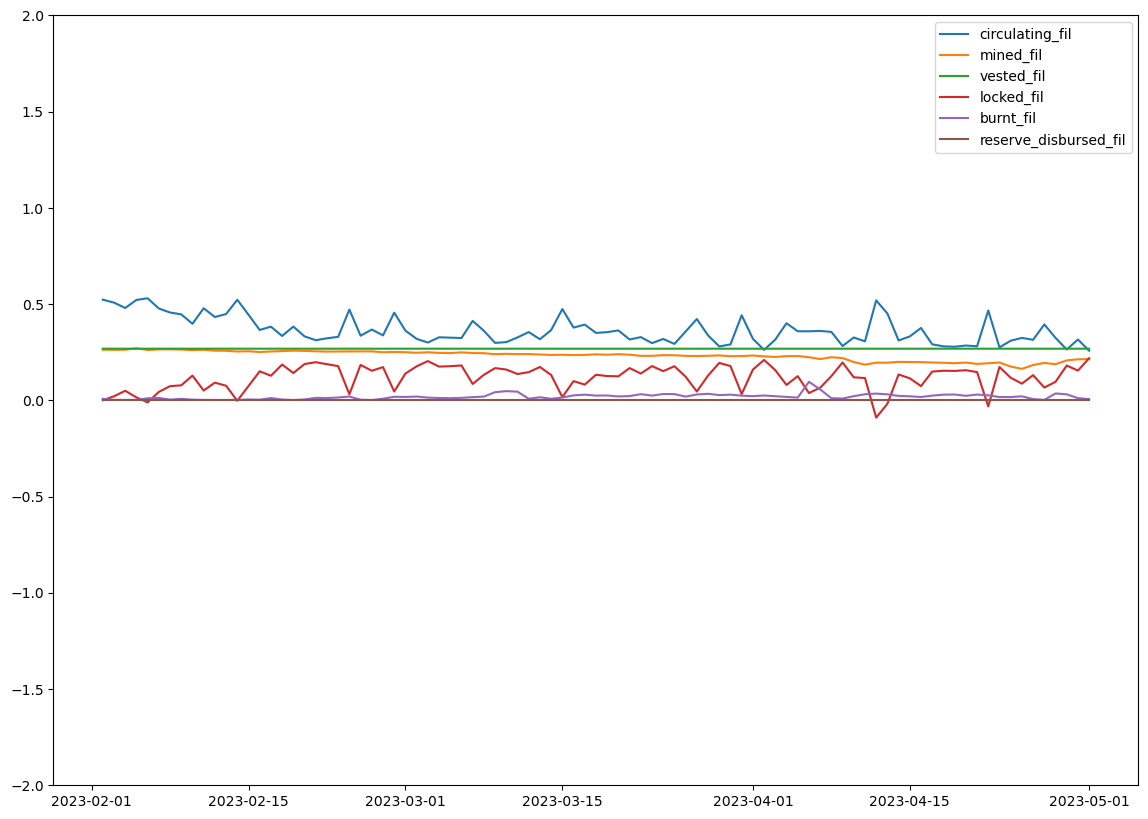

In [37]:
fig,axs=mp.subplots(figsize=(14,10))
for c in ['circulating_fil','mined_fil','vested_fil','locked_fil','burnt_fil','reserve_disbursed_fil']:
    axs.plot(df_out.datestr,df_out['change_'+c[:5]]/1000000, label=c)
    mp.legend()

axs.set_ylim(-2,2)


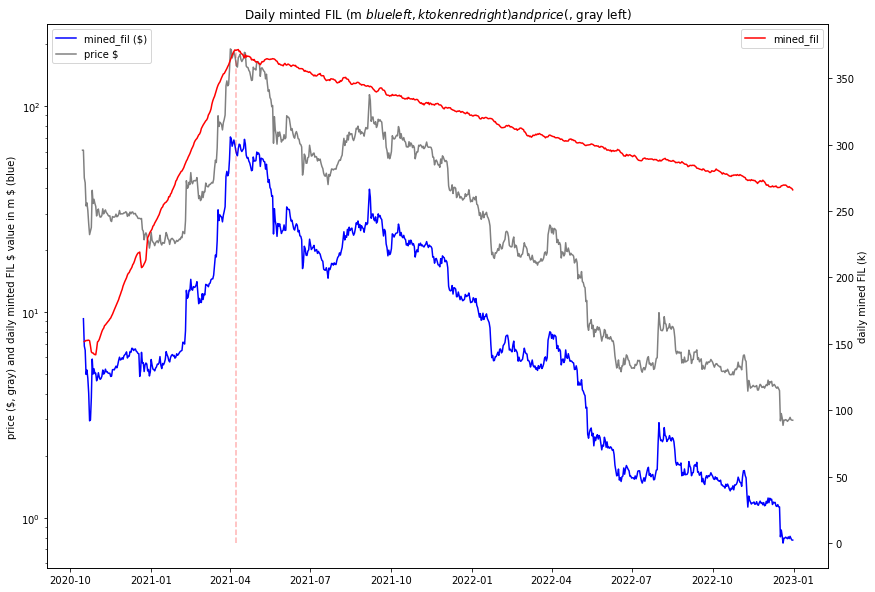

In [366]:
c='mined_fil'
fig,axs=mp.subplots(figsize=(14,10))
axs.plot(df_supply.datestr,df_supply['change_'+c[:5]+'_usd']/1000000, label=c+' ($)', color='b')
axs.plot(df_supply.datestr,df_supply.price, label='price $', color='gray')
axs.set(
    yscale='log',
    ylabel='price ($, gray) and daily minted FIL $ value in m $ (blue)',
    title = 'Daily minted FIL (m \$ blue left, k token red right) and price (\$, gray left)'
)
mp.legend(loc='upper left')
ax2=axs.twinx()
ax2.vlines(df_supply.datestr[df_supply.datestr=='2021-04-7'],0,372, linestyle='dashed',color='r',alpha=0.3)
ax2.plot(df_supply.datestr,get_rolling_avg(df_supply['change_'+c[:5]]/1000,7), label=c, color='r')
ax2.set_ylabel('daily mined FIL (k)')
mp.legend()

In [38]:
df_supply['year_month']=[str(df_supply.datestr.iloc[i].year)+'-' + str(df_supply.datestr.iloc[i].month)  for i in range(0, len(df_supply))]

In [39]:
df_supply_month_tmp = df_supply.groupby('year_month').agg(
    datestr = ('datestr','max'),
    change_minted_fil = ('change_mined','sum'),
    change_circulating_fil = ('change_circu','sum'),
    change_burnt_fil = ('change_burnt','sum'),
    change_locked_fil = ('change_locke','sum'),
    change_reserved_fil = ('change_reser','sum'),
    avg_price=('price','mean')
).reset_index()

In [ ]:
df_supply_month = df_supply_month_tmp.merge(df_supply[['datestr','circulating_fil','mined_fil','vested_fil','locked_fil','burnt_fil','reserve_disbursed_fil']], how='left',left_on='datestr',right_on='datestr').reset_index()


In [40]:
df_supply_month.to_csv('filecoin_monthly_rewards.csv')